## Part I: Data Pre-processing

In [1]:
import pandas as pd

In [2]:
# Download the Google Analogy dataset
!wget http://download.tensorflow.org/data/questions-words.txt

--2025-09-14 16:46:33--  http://download.tensorflow.org/data/questions-words.txt
Resolving download.tensorflow.org (download.tensorflow.org)... 142.250.198.91, 142.250.196.219, 142.250.204.59
Connecting to download.tensorflow.org (download.tensorflow.org)|142.250.198.91|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 603955 (590K) [text/plain]
Saving to: 'questions-words.txt.1'

     0K .......... .......... .......... .......... ..........  8% 8.10M 0s
    50K .......... .......... .......... .......... .......... 16% 14.3M 0s
   100K .......... .......... .......... .......... .......... 25% 19.9M 0s
   150K .......... .......... .......... .......... .......... 33% 28.9M 0s
   200K .......... .......... .......... .......... .......... 42% 35.0M 0s
   250K .......... .......... .......... .......... .......... 50% 53.4M 0s
   300K .......... .......... .......... .......... .......... 59% 24.6M 0s
   350K .......... .......... .......... .......... .........

In [3]:
# Preprocess the dataset
file_name = "questions-words"
with open(f"{file_name}.txt", "r") as f:
    data = f.read().splitlines()

In [4]:
# check data from the first 10 entries
for entry in data[:10]:
    print(entry)

: capital-common-countries
Athens Greece Baghdad Iraq
Athens Greece Bangkok Thailand
Athens Greece Beijing China
Athens Greece Berlin Germany
Athens Greece Bern Switzerland
Athens Greece Cairo Egypt
Athens Greece Canberra Australia
Athens Greece Hanoi Vietnam
Athens Greece Havana Cuba


In [9]:
questions = []
categories = []
sub_categories = []
count = 0
tmp_str = ""
cat_str = ""
for item in data:
    ##print(item)
    if item.startswith(": "):
        tmp_str = item
        if count < 5:
            cat_str = "semantic"
            count += 1
        else:
            cat_str = "syntactic"
    else:
        questions.append(item)
        categories.append(cat_str)
        sub_categories.append(tmp_str)

In [7]:
# TODO1: Write your code here for processing data to pd.DataFrame
# Please note that the first five mentions of ": " indicate `semantic`,
# and the remaining nine belong to the `syntatic` category.


In [10]:
# Create the dataframe
df = pd.DataFrame(
    {
        "Question": questions,
        "Category": categories,
        "SubCategory": sub_categories,
    }
)

In [11]:
df.head()

,Question,Category,SubCategory
0,Athens Greece Baghdad Iraq,semantic,: capital-common-countries
1,Athens Greece Bangkok Thailand,semantic,: capital-common-countries
2,Athens Greece Beijing China,semantic,: capital-common-countries
3,Athens Greece Berlin Germany,semantic,: capital-common-countries
4,Athens Greece Bern Switzerland,semantic,: capital-common-countries


In [12]:
df.to_csv(f"{file_name}.csv", index=False)

## Part II: Use pre-trained word embeddings
- After finish Part I, you can run Part II code blocks only.

In [13]:
import pandas as pd
import numpy as np
import gensim.downloader
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [14]:
data = pd.read_csv("questions-words.csv")

In [15]:
MODEL_NAME = "glove-wiki-gigaword-100"
# You can try other models.
# https://radimrehurek.com/gensim/models/word2vec.html#pretrained-models

# Load the pre-trained model (using GloVe vectors here)
model = gensim.downloader.load(MODEL_NAME)
print("The Gensim model loaded successfully!")

The Gensim model loaded successfully!


In [16]:
# Do predictions and preserve the gold answers (word_D)
preds = []
golds = []

for analogy in tqdm(data["Question"]):
      # TODO2: Write your code here to use pre-trained word embeddings for getting predictions of the analogy task.
      # You should also preserve the gold answers during iterations for evaluations later.
      """ Hints
      # Unpack the analogy (e.g., "man", "woman", "king", "queen")
      # Perform vector arithmetic: word_b + word_c - word_a should be close to word_d
      # Source: https://github.com/piskvorky/gensim/blob/develop/gensim/models/keyedvectors.py#L776
      # Mikolov et al., 2013: big - biggest and small - smallest
      # Mikolov et al., 2013: X = vector(”biggest”) − vector(”big”) + vector(”small”).
      """
      a,b,c,d = analogy.lower().split() ## split 4 words in analogy and turn in to lower
      golds.append(d)
      predict = model.most_similar(positive=[b,c], negative=[a], topn=1) ## get the most similar word
      preds.append(predict[0][0])
      
      
      

100%|██████████| 19544/19544 [04:48<00:00, 67.82it/s]


In [17]:
# Perform evaluations. You do not need to modify this block!!

def calculate_accuracy(gold: np.ndarray, pred: np.ndarray) -> float:
    return np.mean(gold == pred)

golds_np, preds_np = np.array(golds), np.array(preds)
data = pd.read_csv("questions-words.csv")

# Evaluation: categories
for category in data["Category"].unique():
    mask = data["Category"] == category
    golds_cat, preds_cat = golds_np[mask], preds_np[mask]
    acc_cat = calculate_accuracy(golds_cat, preds_cat)
    print(f"Category: {category}, Accuracy: {acc_cat * 100}%")

# Evaluation: sub-categories
for sub_category in data["SubCategory"].unique():
    mask = data["SubCategory"] == sub_category
    golds_subcat, preds_subcat = golds_np[mask], preds_np[mask]
    acc_subcat = calculate_accuracy(golds_subcat, preds_subcat)
    print(f"Sub-Category{sub_category}, Accuracy: {acc_subcat * 100}%")

Category: semantic, Accuracy: 65.3399481339497%
Category: syntactic, Accuracy: 61.255269320843084%
Sub-Category: capital-common-countries, Accuracy: 93.87351778656127%
Sub-Category: capital-world, Accuracy: 88.94783377541998%
Sub-Category: currency, Accuracy: 14.203233256351039%
Sub-Category: city-in-state, Accuracy: 30.806647750304013%
Sub-Category: family, Accuracy: 81.62055335968378%
Sub-Category: gram1-adjective-to-adverb, Accuracy: 24.39516129032258%
Sub-Category: gram2-opposite, Accuracy: 20.073891625615765%
Sub-Category: gram3-comparative, Accuracy: 79.12912912912913%
Sub-Category: gram4-superlative, Accuracy: 54.278074866310156%
Sub-Category: gram5-present-participle, Accuracy: 69.50757575757575%
Sub-Category: gram6-nationality-adjective, Accuracy: 87.86741713570981%
Sub-Category: gram7-past-tense, Accuracy: 55.44871794871795%
Sub-Category: gram8-plural, Accuracy: 71.996996996997%
Sub-Category: gram9-plural-verbs, Accuracy: 58.39080459770115%


In [18]:
print(data)

                             Question   Category                 SubCategory
0          Athens Greece Baghdad Iraq   semantic  : capital-common-countries
1      Athens Greece Bangkok Thailand   semantic  : capital-common-countries
2         Athens Greece Beijing China   semantic  : capital-common-countries
3        Athens Greece Berlin Germany   semantic  : capital-common-countries
4      Athens Greece Bern Switzerland   semantic  : capital-common-countries
...                               ...        ...                         ...
19539         write writes talk talks  syntactic        : gram9-plural-verbs
19540       write writes think thinks  syntactic        : gram9-plural-verbs
19541    write writes vanish vanishes  syntactic        : gram9-plural-verbs
19542         write writes walk walks  syntactic        : gram9-plural-verbs
19543         write writes work works  syntactic        : gram9-plural-verbs

[19544 rows x 3 columns]


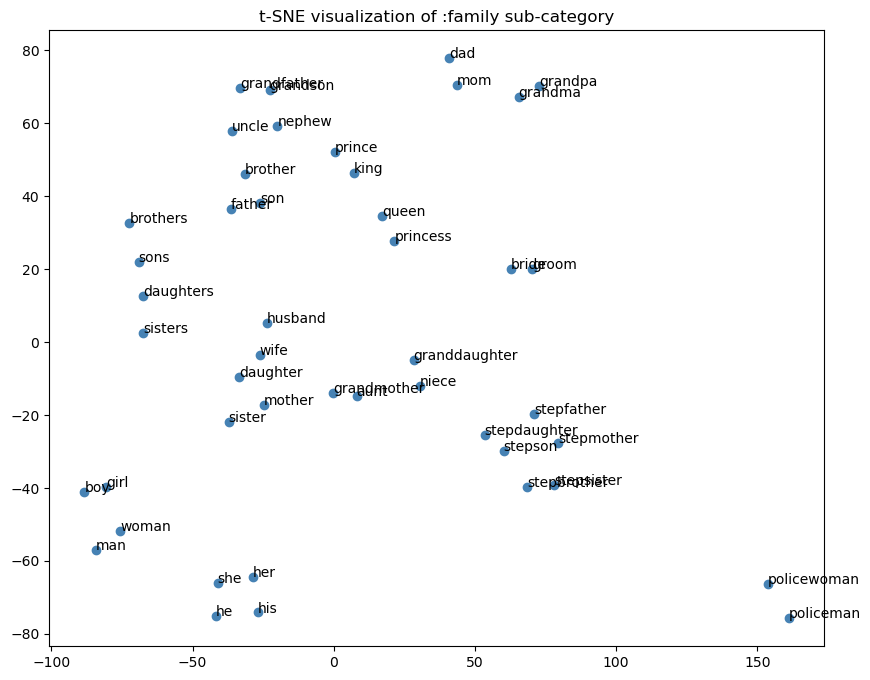

In [ ]:
# Collect words from Google Analogy dataset

# TODO3: Plot t-SNE for the words in the SUB_CATEGORY `: family`
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Filter only : family
family_df = df[df["SubCategory"] == ": family"]

# Collect all words in that subcategory
words = set()
for line in family_df["Question"]:
    parts = line.strip().split()
    if len(parts) == 4:
        words.update(parts)

# Keep only words that exist in the embedding model
words = [w for w in words if w in model]

# Convert to numpy array
vectors = np.array([model[w] for w in words])

# Run t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=5, max_iter=1000)
embeddings_2d = tsne.fit_transform(vectors)

# Plot
plt.figure(figsize=(10, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c="steelblue")

for i, word in enumerate(words):
    plt.annotate(word, (embeddings_2d[i, 0], embeddings_2d[i, 1]))

plt.title("t-SNE visualization of :family sub-category")
plt.show()

### Part III: Train your own word embeddings

### Get the latest English Wikipedia articles and do sampling.
- Usually, we start from Wikipedia dump (https://dumps.wikimedia.org/enwiki/latest/enwiki-latest-pages-articles.xml.bz2). However, the downloading step will take very long. Also, the cleaning step for the Wikipedia corpus ([`gensim.corpora.wikicorpus.WikiCorpus`](https://radimrehurek.com/gensim/corpora/wikicorpus.html#gensim.corpora.wikicorpus.WikiCorpus)) will take much time. Therefore, we provide cleaned files for you.

In [29]:
!pip install gdown


In [30]:
import gdown

In [31]:
# Download the split Wikipedia files
# Each file contain 562365 lines (articles).
!gdown --id 1jiu9E1NalT2Y8EIuWNa1xf2Tw1f1XuGd -O wiki_texts_part_0.txt.gz
!gdown --id 1ABblLRd9HXdXvaNv8H9fFq984bhnowoG -O wiki_texts_part_1.txt.gz
!gdown --id 1z2VFNhpPvCejTP5zyejzKj5YjI_Bn42M -O wiki_texts_part_2.txt.gz
!gdown --id 1VKjded9BxADRhIoCzXy_W8uzVOTWIf0g -O wiki_texts_part_3.txt.gz
!gdown --id 16mBeG26m9LzHXdPe8UrijUIc6sHxhknz -O wiki_texts_part_4.txt.gz

C:\Users\Vito\anaconda3\Lib\site-packages\gdown\__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1jiu9E1NalT2Y8EIuWNa1xf2Tw1f1XuGd
From (redirected): https://drive.google.com/uc?id=1jiu9E1NalT2Y8EIuWNa1xf2Tw1f1XuGd&confirm=t&uuid=507bb139-6c03-4a28-9459-f9fa0952befe
To: c:\Users\Vito\Documents\GitHub\NTHU_Natural_Language_Processing\2025\Assignments\Assignment1\wiki_texts_part_0.txt.gz

  0%|          | 0.00/1.51G [00:00<?, ?B/s]
  0%|          | 3.67M/1.51G [00:00<00:42, 35.4MB/s]
  0%|          | 7.34M/1.51G [00:00<01:51, 13.4MB/s]
  1%|          | 13.1M/1.51G [00:00<01:34, 15.8MB/s]
  1%|          | 15.2M/1.51G [00:00<01:30, 16.4MB/s]
  1%|▏         | 20.4M/1.51G [00:01<01:03, 23.4MB/s]
  2%|▏         | 23.6M/1.51G [00:01<01:28, 16.8MB/s]
  2%|▏         | 27.8M/1.51G [00:01<01:11, 20.8MB/s]
  2%|▏

In [32]:
# Download the split Wikipedia files
# Each file contain 562365 lines (articles), except the last file.
!gdown --id 17JFvxOH-kc-VmvGkhG7p3iSZSpsWdgJI -O wiki_texts_part_5.txt.gz
!gdown --id 19IvB2vOJRGlrYulnTXlZECR8zT5v550P -O wiki_texts_part_6.txt.gz
!gdown --id 1sjwO8A2SDOKruv6-8NEq7pEIuQ50ygVV -O wiki_texts_part_7.txt.gz
!gdown --id 1s7xKWJmyk98Jbq6Fi1scrHy7fr_ellUX -O wiki_texts_part_8.txt.gz
!gdown --id 17eQXcrvY1cfpKelLbP2BhQKrljnFNykr -O wiki_texts_part_9.txt.gz
!gdown --id 1J5TAN6bNBiSgTIYiPwzmABvGhAF58h62 -O wiki_texts_part_10.txt.gz

C:\Users\Vito\anaconda3\Lib\site-packages\gdown\__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=17JFvxOH-kc-VmvGkhG7p3iSZSpsWdgJI
From (redirected): https://drive.google.com/uc?id=17JFvxOH-kc-VmvGkhG7p3iSZSpsWdgJI&confirm=t&uuid=fc33782d-dd4f-4729-99f9-db85157f93ea
To: c:\Users\Vito\Documents\GitHub\NTHU_Natural_Language_Processing\2025\Assignments\Assignment1\wiki_texts_part_5.txt.gz

  0%|          | 0.00/578M [00:00<?, ?B/s]
  0%|          | 2.10M/578M [00:00<00:35, 16.4MB/s]
  1%|          | 4.72M/578M [00:00<00:57, 9.93MB/s]
  1%|▏         | 7.86M/578M [00:00<00:37, 15.0MB/s]
  2%|▏         | 12.1M/578M [00:00<00:44, 12.8MB/s]
  3%|▎         | 18.9M/578M [00:01<00:24, 22.6MB/s]
  4%|▍         | 22.5M/578M [00:01<00:34, 16.3MB/s]
  5%|▌         | 29.4M/578M [00:01<00:36, 14.9MB/s]
  6%|▌        

In [36]:
!pip install gunzip

In [37]:
!pip install cat
!pip install head 

ERROR: Could not find a version that satisfies the requirement cat (from versions: none)
ERROR: No matching distribution found for cat


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for head: filename=Head-1.0.0-py3-none-any.whl size=1233 sha256=331744f5b4e94243b9eb1cca03cf2bc2c1e7eb6ae45fc9b76efd2966d164c69a
  Stored in directory: c:\users\vito\appdata\local\pip\cache\wheels\db\8c\d3\daf4fe7b514c025268813f49e11027f61878bdc75a4fa24355
Successfully built head


In [38]:
import gzip
import shutil

In [40]:
# Extract the downloaded wiki_texts_parts files.
!gunzip -k wiki_texts_part_*.gz

'gunzip' is not recognized as an internal or external command,
operable program or batch file.


In [34]:
# Combine the extracted wiki_texts_parts files.
!cat wiki_texts_part_*.txt > wiki_texts_combined.txt

'cat' is not recognized as an internal or external command,

In [35]:
# Check the first ten lines of the combined file
!head -n 10 wiki_texts_combined.txt


operable program or batch file.
'head' is not recognized as an internal or external command,
operable program or batch file.


Please note that we used the default parameters of [`gensim.corpora.wikicorpus.WikiCorpus`](https://radimrehurek.com/gensim/corpora/wikicorpus.html#gensim.corpora.wikicorpus.WikiCorpus) for cleaning the Wiki raw file. Thus, words with one character were discarded.

In [ ]:
# Now you need to do sampling because the corpus is too big.
# You can further perform analysis with a greater sampling ratio.

import random

wiki_txt_path = "wiki_texts_combined.txt"
# wiki_texts_combined.txt is a text file separated by linebreaks (\n).
# Each row in wiki_texts_combined.txt indicates a Wikipedia article.

with open(wiki_txt_path, "r", encoding="utf-8") as f:
    with open(output_path, "w", encoding="utf-8") as output_file:
    # TODO4: Sample `20%` Wikipedia articles
    # Write your code here

In [ ]:
# TODO5: Train your own word embeddings with the sampled articles
# https://radimrehurek.com/gensim/models/word2vec.html#gensim.models.word2vec.Word2Vec
# Hint: You should perform some pre-processing before training.

In [ ]:
data = pd.read_csv("questions-words.csv")

In [ ]:
# Do predictions and preserve the gold answers (word_D)
preds = []
golds = []

for analogy in tqdm(data["Question"]):
      # TODO6: Write your code here to use your trained word embeddings for getting predictions of the analogy task.
      # You should also preserve the gold answers during iterations for evaluations later.
      """ Hints
      # Unpack the analogy (e.g., "man", "woman", "king", "queen")
      # Perform vector arithmetic: word_b + word_c - word_a should be close to word_d
      # Source: https://github.com/piskvorky/gensim/blob/develop/gensim/models/keyedvectors.py#L776
      # Mikolov et al., 2013: big - biggest and small - smallest
      # Mikolov et al., 2013: X = vector(”biggest”) − vector(”big”) + vector(”small”).
      """

In [ ]:
# Collect words from Google Analogy dataset
SUB_CATEGORY = ": family"

# TODO7: Plot t-SNE for the words in the SUB_CATEGORY `: family`


plt.title("Word Relationships from Google Analogy Task")
plt.show()
plt.savefig("word_relationships.png", bbox_inches="tight")